Let us explore statistical and trends in climate change data of the countries of the world.

The data is downloaded from https://data.worldbank.org/topic/climate-change and contains[link text](https://) data from the year 1960 to 2020.

Let us first import the nescessary modules.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Let us make sure that the xlrd version is 1.2.0 

This will help us to read any excel (xls) file.

In [72]:
!pip install xlrd==1.2.0

Let us ingest and manipulate the data from the excel file using Pandas.

In [76]:
def explore_climate_change(filename):

  ''' Takes in the filename, read, process and return two dataframes'''

  #reading the excel file and storing as a dataframe

  df = pd.read_excel(filename, sheet_name = 0, skiprows=3)

  #processing dataframe to make Country Name as one of the columns

  df_country_as_column = df.set_index('Country Name')

  #processing dataframe to make year as one of the columns

  df_year_as_column = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code' ], 
                              var_name="Year", 
                              value_name="Value")
  df_year_as_column = df_year_as_column.set_index('Year')


  return df_country_as_column, df_year_as_column
  


In [77]:
file = r'/content/drive/MyDrive/world_data_climatechange.xls'

df_country_as_column, df_year_as_column = explore_climate_change(file)

Let us explore the statistical proterties of the few indicators listed below.

In [78]:
df_country_as_column['Indicator Name']. unique()

array(['Urban population (% of total population)', 'Urban population',
       'Urban population growth (annual %)', 'Population, total',
       'Population growth (annual %)',
       'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
       'Prevalence of underweight, weight for age (% of children under 5)',
       'Community health workers (per 1,000 people)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Primary completion rate, total (% of relevant age group)',
       'School enrollment, primary and secondary (gross), gender parity index (GPI)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'CPIA public sector management and institutions cluster average (1=low to 6=high)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Terrestrial and marine protected areas (% of total territorial area)',
       'Marine protected areas (% of territorial waters)',
       'Terrestrial protected 

Now, Let us explore statistical analysis of 'Total greenhouse gas emissions (% change from 1990)' values across various countries.

Using bar plot to get the insights.

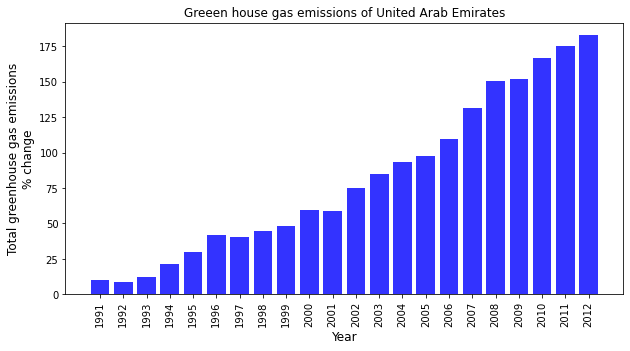

In [8]:
#filtering only greenhouse gas indicator values
df_greenhouse_gas = df_year_as_column.where (df_year_as_column['Indicator Name'] == 'Total greenhouse gas emissions (% change from 1990)').dropna()

#filtering only United Arab Emirates Values
df_ARE_data = df_greenhouse_gas.where (df_greenhouse_gas['Country Name'] == 'United Arab Emirates').dropna()


fig, ax = plt.subplots(figsize = (10,5))
ax.bar(df_ARE_data.index, df_ARE_data.Value, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.title('Greeen house gas emissions of United Arab Emirates')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total greenhouse gas emissions'+ '\n' + '% change', fontsize=12)
plt.show()

The above trend shows that the % change in total green house gas emissions is increasing with years. 

Let us explore the Total greenhouse gas emissions (% change from 1990) of top 3 populated country of the year 2020 and compare with United Arab Emirites.

In [38]:
#filtering only the 'Population, total' indicator values of all countries

df_population_data = df_year_as_column.where (df_year_as_column['Indicator Name'] == 'Population, total').dropna()


#Resetting the index as Year value is kept as an index to filter only the Year-2020 data 
df_population_data.reset_index(inplace =True)
df_population_data_2020 = df_population_data.where(df_population_data['Year']=='2020').dropna()

#Finding the top 3 populated country of the year 2019
df_population_data_2020.sort_values(by = ['Value'], ascending = False)

,Year,Country Name,Country Code,Indicator Name,Indicator Code,Value
16125,2020,World,WLD,"Population, total",SP.POP.TOTL,7.761620e+09
15970,2020,IDA & IBRD total,IBT,"Population, total",SP.POP.TOTL,6.570992e+09
16006,2020,Low & middle income,LMY,"Population, total",SP.POP.TOTL,6.518254e+09
16022,2020,Middle income,MIC,"Population, total",SP.POP.TOTL,5.853105e+09
15969,2020,IBRD only,IBD,"Population, total",SP.POP.TOTL,4.862388e+09
...,...,...,...,...,...,...
15951,2020,Gibraltar,GIB,"Population, total",SP.POP.TOTL,3.369100e+04
16121,2020,British Virgin Islands,VGB,"Population, total",SP.POP.TOTL,3.023700e+04
16054,2020,Palau,PLW,"Population, total",SP.POP.TOTL,1.809200e+04
16111,2020,Tuvalu,TUV,"Population, total",SP.POP.TOTL,1.179200e+04


Let us explore the trends in 'Total green house gas emissions, (% change from 1990)" of top 3 populated countries and United Arab Emirates.

<Figure size 432x288 with 0 Axes>

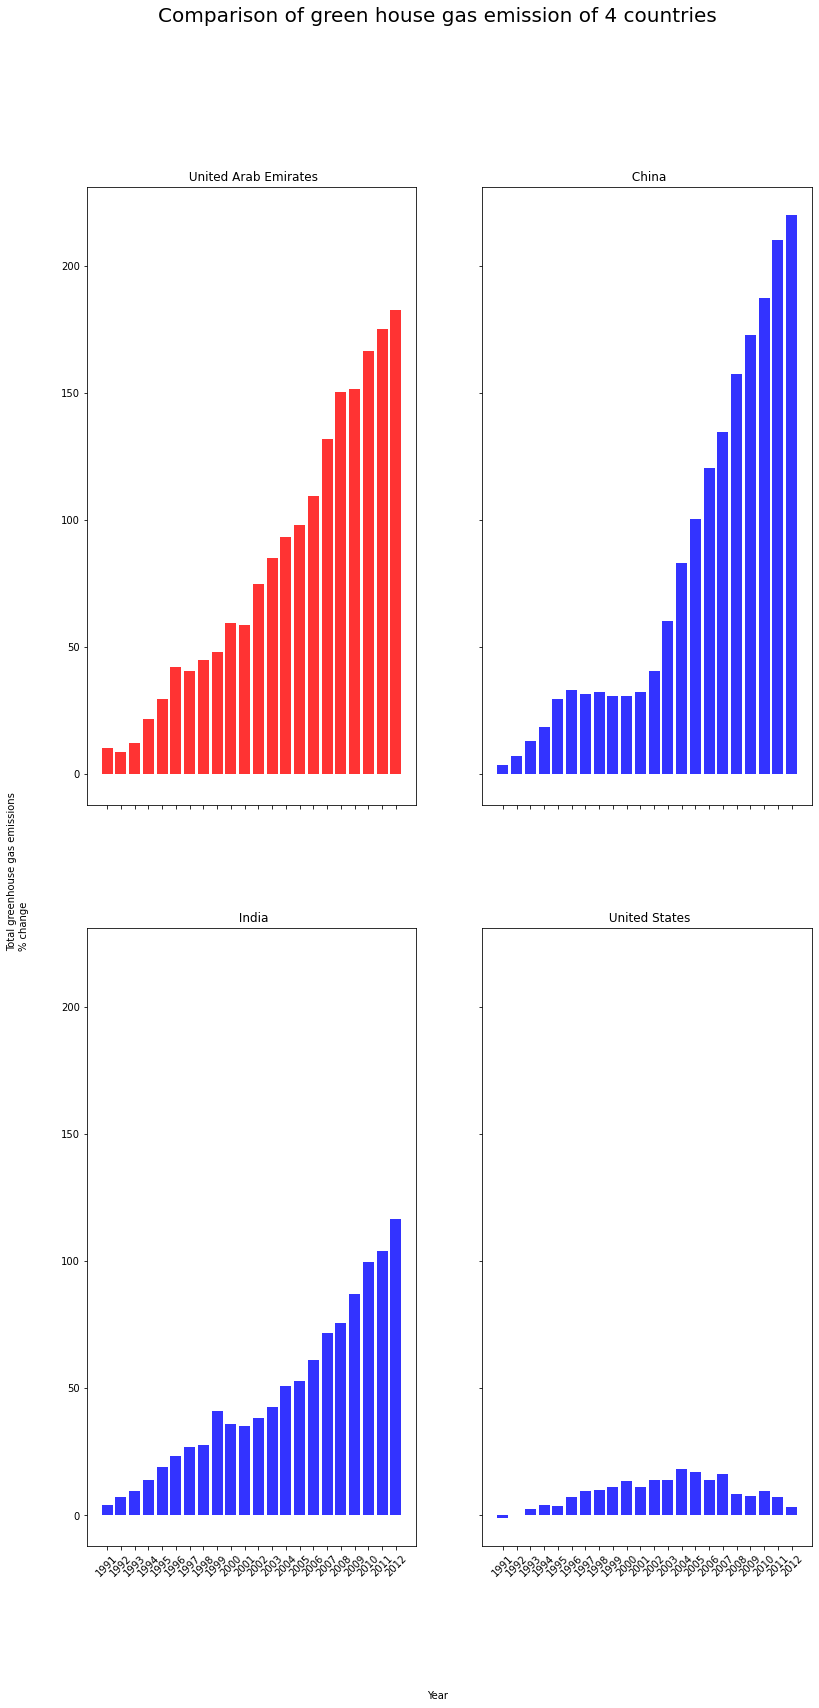

In [103]:
#filtering only India data
df_India_data = df_greenhouse_gas.where (df_greenhouse_gas['Country Name'] == 'India').dropna()

#filtering only China data
df_China_data = df_greenhouse_gas.where (df_greenhouse_gas['Country Name'] == 'China').dropna()

#filtering only United States
df_US_data = df_greenhouse_gas.where (df_greenhouse_gas['Country Name'] == 'United States').dropna()

#filtering only world data
df_world_data = df_greenhouse_gas.where (df_greenhouse_gas['Country Name'] == 'World').dropna()

#creating subplots to compare the trends in United Arab Emirates with other countries

plt.figure()

# create a 2x2 grid of subplots
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, squeeze=False, sharex=True, sharey=True, figsize=(13,25))

ax = [ax1, ax2, ax3, ax4]

ax[0].bar(df_ARE_data.index, df_ARE_data.Value, alpha=0.8, color='red')
ax[1].bar(df_China_data.index, df_China_data.Value, alpha=0.8, color='blue')
ax[2].bar(df_India_data.index, df_India_data.Value, alpha=0.8, color='blue')
ax[3].bar(df_US_data.index, df_US_data.Value, alpha=0.8, color='blue')

# rotate the tick labels for the x axis
plt.setp(ax[2].xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax[3].xaxis.get_majorticklabels(), rotation=45)

ax[0].set_title(' United Arab Emirates')
ax[1].set_title(' China')
ax[2].set_title(' India')
ax[3].set_title(' United States')
plt.suptitle('Comparison of green house gas emission of 4 countries',fontsize=20)
fig.text(0.5, 0.04, 'Year', ha='center')
fig.text(0.04, 0.5, 'Total greenhouse gas emissions'+ '\n' + '% change', va='center', rotation='vertical')

    
plt.show()


From the above trend it is clear that % change of green house gas emission is increasing in all the countries over years except for United States. Though the population of United States are greater than United Arab Emirates.% change of the green house gas emission in United states has decreased over years. Hence, population growth may not be correlated with % change of green house gas emission.

Let us explore correlation of "green house gas emission" with other indicators and see which is more related.

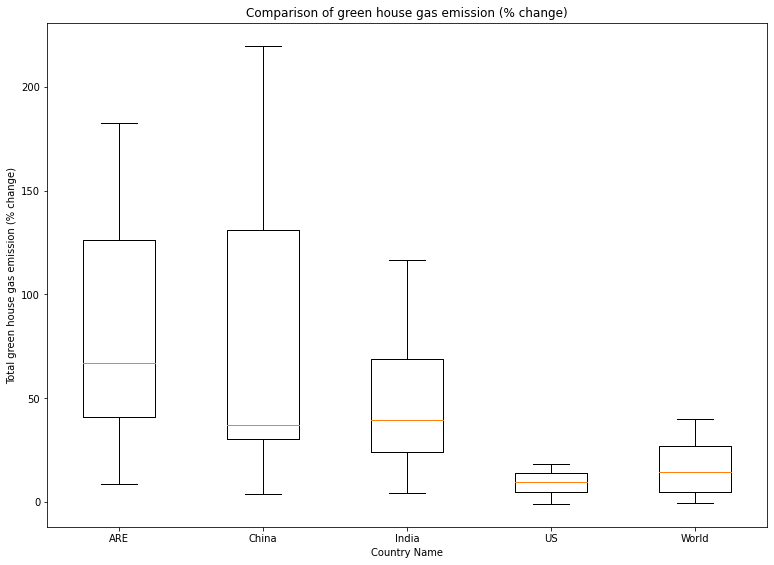

In [104]:
data = [df_ARE_data['Value'], df_China_data['Value'], df_India_data['Value'], df_US_data['Value'], df_world_data['Value']]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)
plt.xticks([1, 2, 3, 4, 5], ['ARE', 'China', 'India', 'US', 'World'])
ax.set_title('Comparison of green house gas emission (% change)')
ax.set_xlabel('Country Name')
ax.set_ylabel('Total green house gas emission (% change)')

# show plot
plt.show()


On comparing the median values, the US value seems to be much lesser than India, China & ARE. % Change of Total green house gas emission seems to be higher in case of United Arab Emirates(ARE). % change of green house gas emission of the "World" seems to be low.

Let us understand the corelations between Total green house gas emission and Urban population

In [223]:
#filtering only United Arab Emirates data
df_ARE_all_data = df_year_as_column.where (df_year_as_column['Country Name'] == 'United Arab Emirates').dropna()

#Removing the indicator 'Total greenhouse gas emissions (% change from 1990)'
indicator_list = df_ARE_all_data['Indicator Name']. unique()
corrcoef_output = list()

df_ARE_all_data.reset_index(inplace = True)
df_ARE_data.reset_index(inplace = True)

for indicator in indicator_list:
  if (indicator == 'Urban population'):
    data1 = df_ARE_all_data.where(df_ARE_all_data['Indicator Name'] == 'Urban population').dropna()
    data1= data1.iloc[:][31:53]
    corrcoef_output.append(np.corrcoef(data1['Value'], df_ARE_data['Value'] )) 
    print(corrcoef_output)
  



[array([[1.        , 0.97806635],
       [0.97806635, 1.        ]])]


The correlation coefficient value between Urban population and % change of total green house gas emission indicates the high correlation between the same. Hence, we can say, green house gas emission increases on increase in urban population.